## Теория.

Дано уравнение: $y''=f(x,y), a<x<b (1)$

и граничные условия: $y(a) = y_a, y(b) = y_b(2)$.

Нужно найти такой h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
$y(b,h)=y_b$ 

Требуется найти решение $(1)-(2)$ и построить его график.

## Вариант 10.

$a = 0$

$b = 2$

Уравнение: $\frac{y}{x^{2}+1}$

$y_a = 4$ 

$y_b = -2$ 

### ШАГ 1. 

Задаем наугад число $h_0$, решаем задачу Коши.

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

Берем $h_0 = 3$.

In [2]:
a = 0
b = 2
y_a = 4
y_b = -2
h_0 = 3

def dydt(Y, t):
    return [Y[1], (Y[0])/(math.pow(t,2)+1)]

# def dydx(x, y):
#     return (y)/(x**2+1)

Далее вычисляем $y(b,h_0)$.

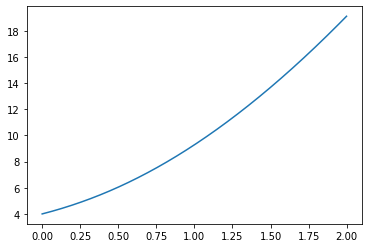

y(b, h0) = 19.114628718218412 h0 =  3


In [3]:
step = 0.001

result = integrate.odeint(dydt, [y_a, h_0], np.arange(a, b, step))
plt.plot(np.arange(a, b, step), result[:, 0])
plt.show()
print("y(b, h0) =", result[-1, 0], "h0 = ", h_0)

 Т.к. при $h_0 = 3$ Значение функции получилось равным 4.1511. Следовательно берем шаг с "-".

### ШАГ 2.

Выберем шаг $h_0$ и решаем несколько раз задачу Коши при $h_1 = h_0 + \Delta h$. Возьмем $\Delta h = -0.01$

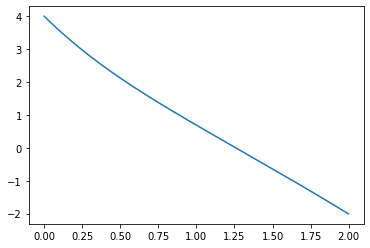

y(b, h1) = -2.0094433654282207 < yb =  -2
y_n = -2.0094433654282207 ;y_n_1 = -1.9815014708441865
h_n = -4.559999999999928 ;h_n_1 = -4.549999999999928


In [4]:
delta_h = -0.01

h_n = h_0
while result[-1, 0] > y_b:
    h_n += delta_h
    result = integrate.odeint(dydt, [y_a, h_n], np.arange(a, b, step))
    
y_n = result[-1, 0]
h_n_1 = h_n-delta_h
y_n_1 = integrate.odeint(dydt, [y_a, h_n-delta_h], np.arange(a, b, step))[-1,0]
plt.plot(np.arange(a, b, step), result[:, 0])
plt.show()
print("y(b, h1) =", y_n, "< yb = ", y_b)
print("y_n =", y_n, ";y_n_1 =", y_n_1)
print("h_n =", h_n, ";h_n_1 =", h_n_1)

Получили "Вилку": $h_n = -4.5599 < h < -4.5499 = h_{n-1}$

### ШАГ 3.

Применяем стандартный процесс половинного деления.

### ШАГ 4.

Останавливаем процесс, когда выполнится неравенство $y(b,h_n)-y(b,h_{n-1})<0.001$

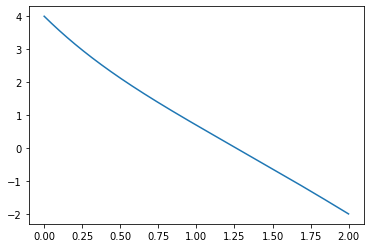

y(b, h) = -1.999838339172475 h =  -4.556562499999927


In [5]:
error = 0.001

med = 0
while abs(y_n - y_n_1) >= error :
    med = (h_n + h_n_1)/2
    result = integrate.odeint(dydt, [y_a, med], np.arange(a, b, step))
    if(result[-1,0] > y_b):
        h_n_1 = med
        y_n_1 = result[-1,0]
    else:
        h_n = med
        y_n = result[-1,0]

plt.plot(np.arange(a, b, step), result[:, 0])
plt.show()
print("y(b, h) =", result[-1,0], "h = ", med)   

### ВЫВОДЫ

Была решена краевая задача для уравнения 2-ого порядка.

Была найдена: $h =  -4.556562499999927$

Было найдено значение функции: $y(b, h) = -1.999838339172475$